# *Exploratory Data Analysis*

*Table of Contents :*
* *Previous Notebook References*  
    * [*Data Wrangling*](https://nbviewer.jupyter.org/github/Gkchandora/Breast_Cancer_Prediction/blob/main/Model_Building_Steps/NB_1_Data_Wrangling.ipynb)
* [*Import libraries and Utility Modules*](#1)
* [*Descriptive Statistics*](#2)
* [*Data Visualization*](#3)
    * [*Response Variable*](#3.1)
    * [*Box Plot*](#3.2)



*Uptil now we have a good intuitve sense of data, lets take step further to get a closer look of attributes and data values. This will provide useful knowledge for data pre-processing.*

## *Import libraries and Utility Modules*<a id=1></a>

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tabulate import tabulate
import shutil

# graph styles 
mpl.style.use("ggplot")

In [2]:
# import utility modules(i.e. previous notebook variables, methods etc) via Url
import httpimport

address = "https://raw.githubusercontent.com/Gkchandora/Breast_Cancer_Prediction/main/Model_Building_Steps/utility_modules"

with httpimport.remote_repo(["data_wrangling"], address):
    from data_wrangling import *

In [3]:
# cleaned data preview
df.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## *Descriptive Statistics*<a id=2></a>

In [4]:
# Types of Features : Discrete(in Categorical sense) and Continuous 

features_description = {"Discrete_Features":[],
                "Continuous_Features": []}

if __name__ == "__main__":
    for column in df.columns:

        # setting threshold to 5% of total observations to decide discrete vs categorical

        if df[column].nunique()/df[column].count() < 0.05 :
            # store it in Discrete Features list
            features_description["Discrete_Features"].append(column)

        else :
            # store it in Continuos Features list
            features_description["Continuous_Features"].append(column)

    # print the features descriptions
    for key, value in features_description.items() :
        print(f"{key} are : {value}\n")

Discrete_Features are : ['target']

Continuous_Features are : ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']



*So the `target` valriable is only discrete while all the other features are continous.*


In [5]:
# statistical summary of the data
if __name__ == "__main__":
    print("The Statisical summary of the data : \n")
df.describe() 

The Statisical summary of the data : 



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


*Insights*
* ***Normalisation*** *of the data is required as scale varies for the features* : 
    * *most of the features values lies between*
$[0, 1]$
    * *`area_mean`features has exceptionally high range values which lies between*
$[143, 2501]$
* *some features have large standard deviations : `area_mean`, `perimeter_mean`, `area_se`, `area_worst`*

In [6]:
# features with high standard deviations > 20(set threshold)
if __name__ =="__main__":

    # satandard deviation of featues
    std_dev = df.describe().loc["std"]
    std_dev = std_dev[std_dev > 20]
    std_dev.index.name = "Features"
    std_dev = std_dev.reset_index( name  = "Standard Deviations(std)")
    print(f" Features with higher standard deviations are :\n \n{tabulate(std_dev, headers = 'keys', tablefmt = 'psql')}")

 Features with higher standard deviations are :
 
+----+-----------------+----------------------------+
|    | Features        |   Standard Deviations(std) |
|----+-----------------+----------------------------|
|  0 | perimeter_mean  |                    24.299  |
|  1 | area_mean       |                   351.914  |
|  2 | area_se         |                    45.491  |
|  3 | perimeter_worst |                    33.6025 |
|  4 | area_worst      |                   569.357  |
+----+-----------------+----------------------------+


## *Data Visualization*<a id=3></a>  

#### *Distribution of Dependent Variable(i.e. Target)*<a id=3.1></a>

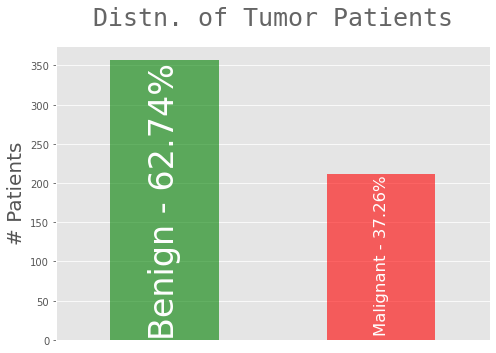

In [7]:
# Plot the bar graph to visulaize the distribution of patients having : Benign vs Malignant Tumor

# figure
x,y = 7,5
plt.figure(figsize = (x,y))

# bar graph
target_distn = df["target"].value_counts().sort_index() 
target_distn.plot(kind ="bar", color = ['green', 'red'], alpha = 0.6, width = 0.5, )

# categories percentage
categories = ["Benign", "Malignant"]
categories_percent = [100*(value/target_distn.sum()) for value in target_distn ]

# to get coordinates for annotations
ax = plt.gca() # current axes
rects = ax.patches # axes of each bars in bar graph

# categories annotations
for i in range(len(categories)):
    txt = f"{categories[i]} -{categories_percent[i] : 0.2f}%"
    plt.annotate(s = txt,
                 xy = (rects[i].get_x() + rects[i].get_width()/2, 
                       rects[i].get_y()+ (ax.get_yticks()[1] - ax.get_yticks()[0])*.2, # chose 2% of y axis scale for positon of y coordinate.
                       ),
                 fontsize = (rects[i].get_height())*y*.28/len(txt),
                 color = "white",
                 ha = "center", # horizontal alignment of text at given x,y coordinate
                 rotation = 90,
                 )
plt.ylabel("# Patients", fontsize = 20,)
plt.title("Distn. of Tumor Patients", fontsize = 25, fontname = "Monospace", alpha = .6, y = 1.05)
plt.xticks([])
plt.tight_layout(rect=[0, 0, 1, 1])
# plt.savefig("1_EDA_Dist_of_Tumor_Patients.png", bbox_inches = "tight", dpi = 120)
plt.show()

*Insights :*  
*The percentage of patients with Benign and Malignant tumor are 62.74 and 37.26 . So, its not a case a of imbalanced class data.* 

#### *Box Plot*<a id=3.2></a>

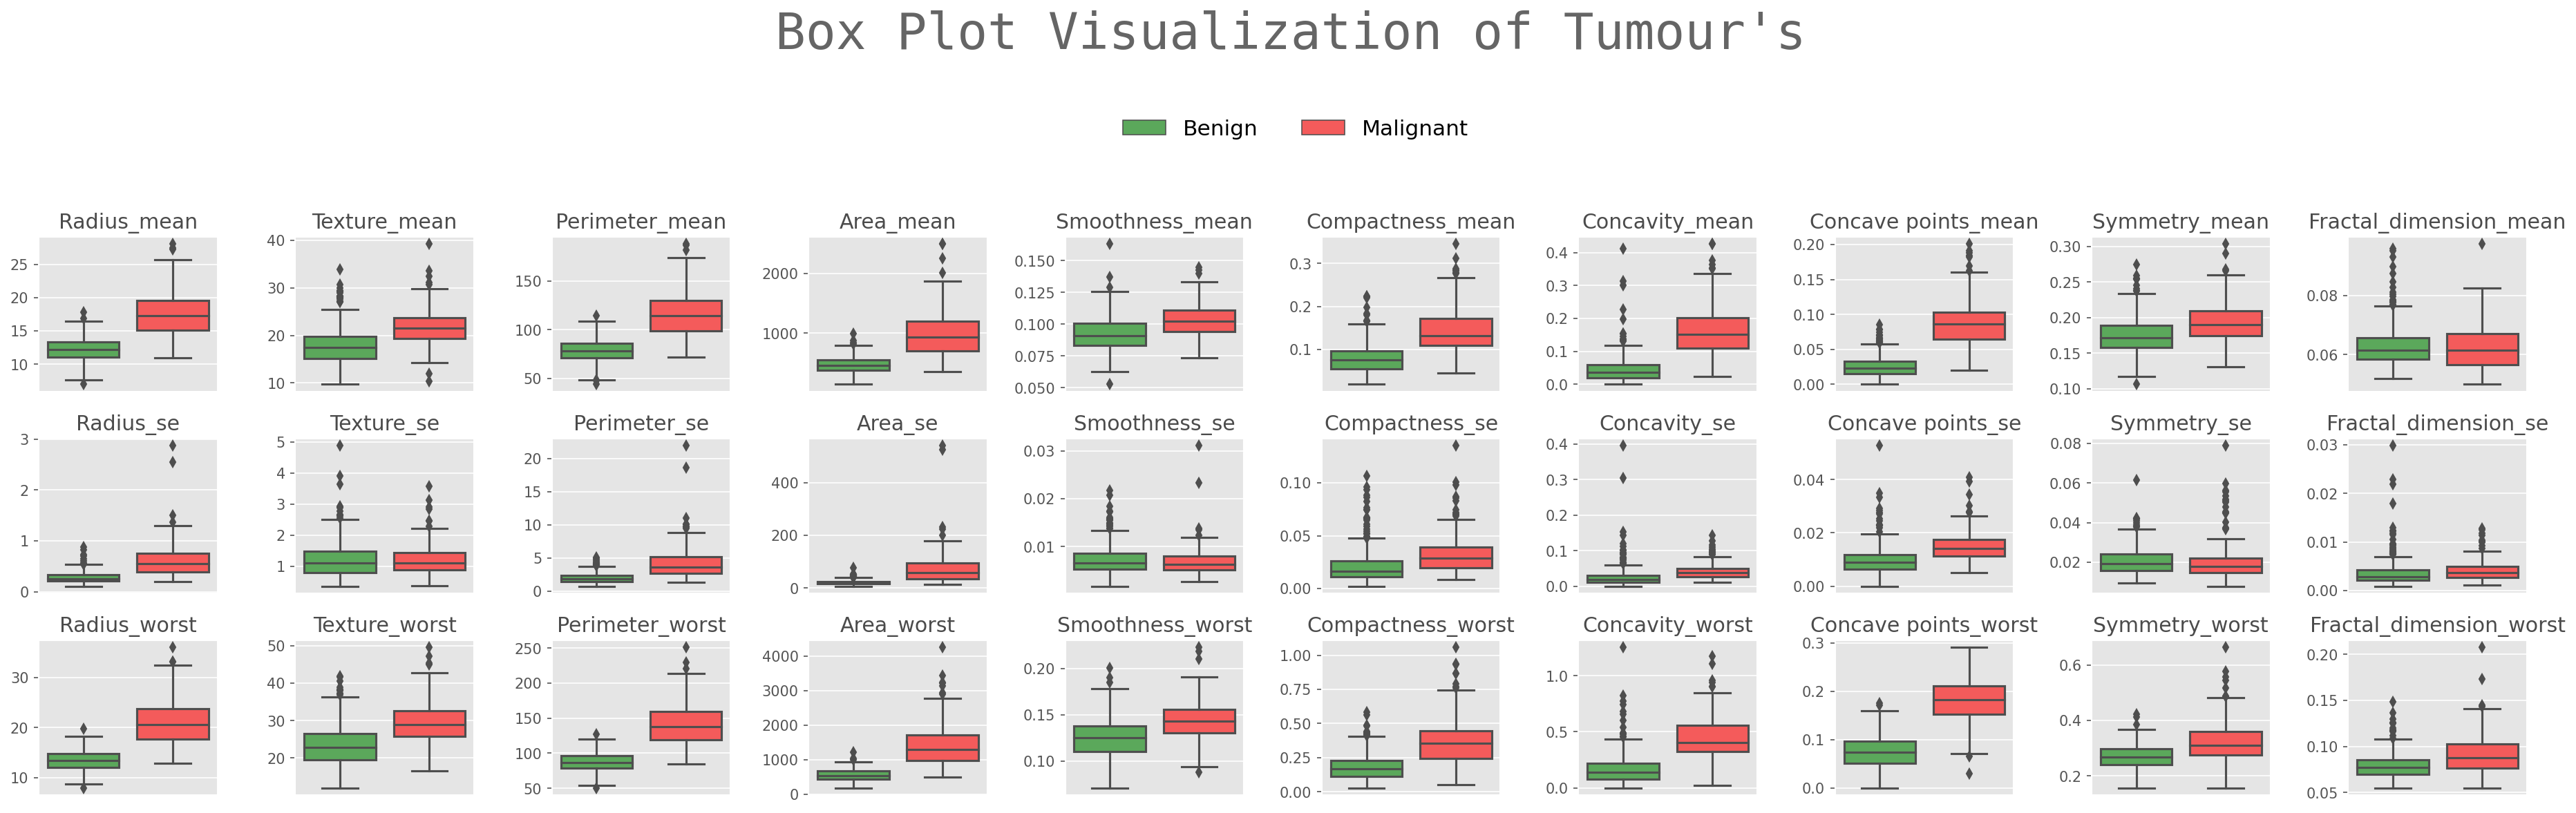

In [8]:
# In Dataframe set B : Benign  and M : Malignant 
df["target"] = df['target'].map(lambda x: 'Benign' if x == 'B' else "Malignant")

############################ box plot ######################################

# figure and axes objets
fig, axes = plt.subplots(nrows = 3, ncols = 10, figsize = (25, 6), dpi = 150)
axes = axes.flatten()

# loop for creating box plot for each feature
for i, column in enumerate(list(df.columns)[1:]):

    # box plot
    sns.boxplot(ax = axes[i],                            # axes for drawing the graph
                x = "target",                            # Respond Variable on x-axis
                y = column,                              # Feature on y-axis 
                data = df,                               # dataframe
                orient = "v",                            # orientation of box plot
                hue = "target",                          # categorical variable
                dodge = False,                           # alignment of box plot with categorical axis, here x-axis
                hue_order = ["Benign", "Malignant"],     # order for names of categories in legend box
                order = ["Benign", "Malignant"],         # order of plotting categories
                palette=['#5ba85b', '#f45b5b'],          # earlier used color hex vlaues for "green" and "red" in Distribution of Tumor's Patient
                saturation = 1.5,                        # color brightness adjustment
                )
    
    axes[i].get_xaxis().set_visible(False)               # x-axiss set to invisible mode
    axes[i].set_ylabel("")                               # y axis label empty
    axes[i].set_title(column.capitalize(), alpha = 0.7)  # title for present box plot  
    axes[i].legend("", frameon = False)                  # set empty legend for present subplot

# single legend for all boxplots i.e, subplots
handles, labels = plt.gca().get_legend_handles_labels()  #axes[-1].get_legend_handles_labels()   # returns a list of Artists and labels(i.e. strings) 
fig.legend(handles = handles,                            # artist list
           labels = labels,                              # labels(i.e. list of string )
           loc ='center',                                # positon of legend 
           fontsize = 15 ,                               # labels font size 
           bbox_to_anchor=(0.5, 1.1),                    # coordintes of boundind box point wrt loc parameter 
           ncol = 2,                                     # to put labels in column vector,
           frameon = False                               # bounding box frame on/off 
           )

# Single title for all boxplots or subplots
plt.suptitle(t = r"Box Plot Visualization of Tumour's",   # title 
             x = 0.5, y = 1.3,                           # coordinates for title 
             fontsize = 35,                              # fontsize
             alpha = .6,                                 # opacity of title font color
             fontname = "Monospace",                     # font style
             color = "black"                             # font color
             )               

plt.tight_layout(rect=[0, 0, 1, 1])
# plt.savefig("2_EDA_1_Box_Plot_Tumor_Viz.png", bbox_inches='tight', dpi = 150)
plt.show()

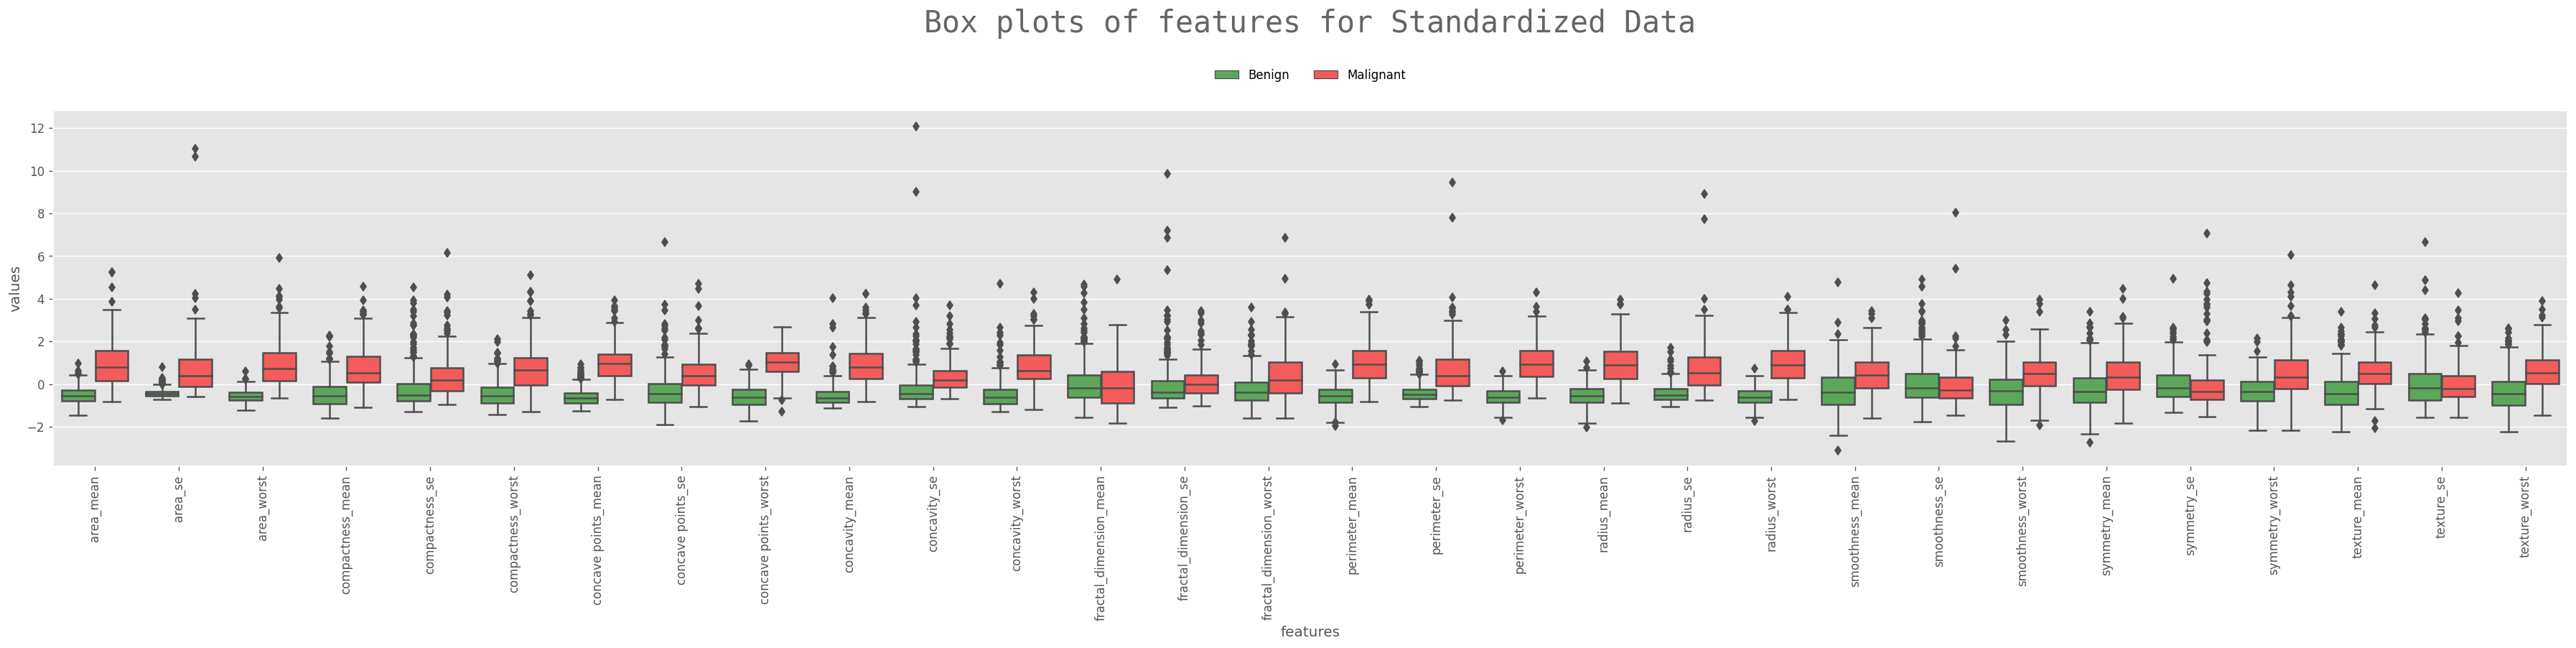

In [9]:
# Alternate BoxPlots Graph
# All box plots in one graph with a standardized data.
stdz_df = df[df.columns[1:]].apply(lambda x : (x - x.mean())/x.std(), axis = 0) 
stdz_df["target"] = df["target"] 

# metled dataframe of standardize data
melted_stdz_df = pd.melt(stdz_df, id_vars = ["target"], value_vars = list(stdz_df.columns[:-1]), var_name = "features", value_name = "values" )

# figure size and dpi
plt.figure(figsize = (30,8),dpi = 120)

# single graph
sns.boxplot(data = melted_stdz_df,
            x = "features",
            y = "values",
            hue = "target",
            hue_order = ["Benign", "Malignant"],
            order = sorted(melted_stdz_df.features.unique()), # sorted list of all the features
            palette = ['#5ba85b', '#f45b5b'], # previous used colors 
            saturation = 1.5,                # color brightness
            )

# legend 
plt.legend(title = "", frameon = False, bbox_to_anchor = (0.5, 1.1), loc = "center", ncol = 2)

# graph labeling
plt.xticks(rotation = 90,)
plt.title("Box plots of features for Standardized Data", y = 1.2, alpha = 0.6, fontname = "Monospace", fontsize = 25)
plt.tight_layout(rect=[0, 0, 1, 1])
# plt.savefig("3_EDA_Boxplots_for_Standardized_data.png", bbox_inches='tight')
plt.show()